<a href="https://colab.research.google.com/github/PunithKumarR/MachineLearningAssignment/blob/main/Copy_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [4]:
df = pd.read_csv('car_data.csv')
df.head()


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.shape

(804, 12)

In [6]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [7]:
df=df.drop_duplicates()

In [8]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [9]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [10]:
df_1=df

In [11]:
df_1.shape

(804, 12)

In [12]:
percentile25=df['Price'].quantile(0.25)
percentile75=df['Price'].quantile(0.75)
iqr=percentile75-percentile25
print('percentile25 :',percentile25)
print('percentile75 :',percentile75)
print('IQR :',iqr)

percentile25 : 14273.073870330325
percentile75 : 26717.3166356619
IQR : 12444.242765331575


In [13]:
max_limit=percentile75+1.5*iqr
min_limit=percentile25-1.5*iqr
print(max_limit)
print(min_limit)

45383.68078365926
-4393.290277667038


In [14]:
df[df['Price']>max_limit]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
80,51154.047216,2202,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,1,1
81,49248.158967,6685,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,0,1
82,46747.673270,15343,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,1,1
140,48310.329545,788,Cadillac,STS-V8,Sedan 4D,Sedan,8,4.6,4,1,0,1
141,48365.980897,2616,Cadillac,STS-V8,Sedan 4D,Sedan,8,4.6,4,1,1,1
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1


In [15]:
df[df['Price']<min_limit]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather


In [16]:
outlier_removed=df[(df['Price']>min_limit)&(df['Price']<max_limit)]
outlier_removed

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [17]:
df_1=outlier_removed.copy()

In [18]:
X = df_1.loc[:, ['Mileage']].values
y = df_1.loc[:, ['Price']].values

In [19]:
X.shape

(787, 1)

In [20]:
y.shape

(787, 1)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)

In [22]:
model=linear_model.LinearRegression()
model
model.fit(X_train,y_train)

LinearRegression()

In [23]:
model.predict((X_test))
y_pred=model.predict((X_test))


In [24]:
model.coef_

array([[-0.1090818]])

In [25]:
model.intercept_

array([23106.3440852])

In [26]:
y=-0.20164387*(11000)+25206.12603343
y

22988.04346343

In [27]:
y_predict=model.predict(X_test)
y_predict

array([[20453.69287295],
       [21763.11080007],
       [20581.86398794],
       [21022.88170532],
       [20907.47316092],
       [22854.58329081],
       [20741.99607033],
       [23077.3283264 ],
       [23010.24301941],
       [17610.03942891],
       [19677.24862059],
       [20944.56097292],
       [20770.03009293],
       [22403.09372064],
       [20664.87523774],
       [21444.70102589],
       [20308.28683356],
       [21351.4360869 ],
       [20443.11193835],
       [22979.80919721],
       [20299.99661676],
       [21214.53842791],
       [21475.78933889],
       [19171.32723222],
       [22014.32618546],
       [20118.15725617],
       [20215.34913996],
       [20356.17374375],
       [22260.41472625],
       [20113.35765697],
       [20957.54170712],
       [19902.82978298],
       [20234.43845496],
       [20622.44241754],
       [22209.58260745],
       [21978.65643686],
       [21070.76861551],
       [22028.39773766],
       [18866.77084664],
       [21180.39582451],


Text(0.5, 1.0, 'Mileage VS Price')

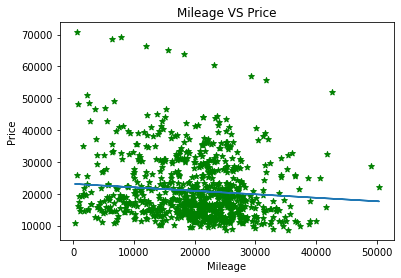

In [28]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.scatter(df.Mileage,df.Price,color='green',marker='*')
plt.plot(X_test,y_predict)
plt.title('Mileage VS Price')


In [29]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_predict))

R2- SCORE: -0.011684221176733622


In [30]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [31]:
cols=df.columns[:-1]
cols

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound'],
      dtype='object')

In [32]:
df1=df[['Price','Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
df1

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,6,3.1,4,1,1,1
1,17542.036083,9135,6,3.1,4,1,1,0
2,16218.847862,13196,6,3.1,4,1,1,0
3,16336.913140,16342,6,3.1,4,1,0,0
4,16339.170324,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0
800,16175.957604,19095,6,3.0,4,1,1,0
801,15731.132897,20484,6,3.0,4,1,1,0
802,15118.893228,25979,6,3.0,4,1,1,0


In [33]:
df1.shape

(804, 8)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 803
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Cylinder  804 non-null    int64  
 3   Liter     804 non-null    float64
 4   Doors     804 non-null    int64  
 5   Cruise    804 non-null    int64  
 6   Sound     804 non-null    int64  
 7   Leather   804 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 56.5 KB


In [35]:
df1.isnull().sum()

Price       0
Mileage     0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [36]:
df1=df1.drop_duplicates()

In [37]:
df1.dtypes

Price       float64
Mileage       int64
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [38]:
df1.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [39]:
cols=df1.columns[:-1]
cols

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound'], dtype='object')

In [40]:
for i in cols:
  percentile25=df[i].quantile(0.25)
  percentile75=df[i].quantile(0.75)
  iqr=percentile75-percentile25
  max_limit=(percentile75+1.5*iqr)
  min_limit=(percentile25-1.5*iqr)
print(f'iqr is :{iqr},\n min_limit value is:{min_limit},\n max_limit value is:{max_limit}')

iqr is :1.0,
 min_limit value is:-1.5,
 max_limit value is:2.5


In [41]:
x = df1[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values
y=df1['Price'].values

In [42]:
x

array([[8.2210e+03, 6.0000e+00, 3.1000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.1350e+03, 6.0000e+00, 3.1000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.3196e+04, 6.0000e+00, 3.1000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [2.0484e+04, 6.0000e+00, 3.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.5979e+04, 6.0000e+00, 3.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.5662e+04, 6.0000e+00, 3.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [43]:
y

array([17314.1031289 , 17542.03608328, 16218.84786194, 16336.91314005,
       16339.17032393, 15709.05282108, 15230.00338985, 15048.04218412,
       14862.0938696 , 15295.01826688, 21335.85248489, 20538.08751023,
       20512.09409124, 19924.1590524 , 19774.24906607, 19344.16553736,
       19105.13012442, 18543.42704537, 17808.19899602, 17968.83827826,
       22358.87767812, 23785.92252638, 22926.09037126, 21895.7587842 ,
       21273.06171392, 21460.01395289, 21183.12358742, 20406.09950289,
       21058.13957995, 19556.89932029, 23447.68656101, 23547.23944288,
       23016.00800868, 22230.02750256, 22625.07356605, 21799.17209689,
       21341.25720707, 21683.03146355, 20986.01601748, 20902.10379431,
       20698.07708317, 20099.25684484, 18145.12648909, 17944.85692346,
       19027.86230543, 18348.89857169, 17750.88457463, 17772.96968004,
       17394.0213978 , 17645.74504414, 21908.36662462, 21956.34266271,
       21646.11692355, 21575.456827  , 20952.2178016 , 21562.04757786,
      

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 7)


In [45]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
y_predict


array([23279.00737268, 17183.06297168, 10002.03531624, 25728.06264543,
        8561.1223531 , 37179.35126326, 30287.34180605, 21251.29685105,
       26326.89902799, 34377.59241369, 37113.80238495, 11536.84728063,
       20246.20315878, 12388.03795049, 14154.6199956 , 20206.63496937,
       33032.23019547, 19649.9928921 , 22696.52560317, 16246.49969481,
       15839.56110263, 21867.1124422 , 13970.26730314, 18533.0146635 ,
       28957.58950041, 21466.13564256, 18277.79729058, 18949.53098295,
       38220.31752141, 15641.72548179, 20738.35145331, 20387.17884817,
       24952.07308853, 39842.99085277, 22942.74797397, 17986.17282801,
       27523.2037025 , 17497.43940325, 11518.98248598, 20205.2239284 ,
       20356.60944302, 17251.31625734, 18158.79892489, 14876.70630573,
       16491.81649952, 17573.13980868, 15292.0983267 , 27881.61006771,
       20275.52955565, 19530.11466717, 19546.00619995, 18366.43819633,
       25907.35537834, 18566.63251385, 17996.1008054 , 18459.88416803,
      

In [46]:
m=model.coef_
m

array([-2.20965030e-01,  3.60373178e+03, -4.46688647e+02, -1.81630216e+03,
        6.46938454e+03, -2.30648236e+03,  3.74609177e+03])

In [47]:
c=model.intercept_
c

8669.083829428922

In [48]:
y_1=m*(x_test)+c
y_1

array([[ 6456.34001516, 30291.47450195,  6971.66697085, ...,
        15138.46837278,  6362.60146474,  8669.08382943],
       [ 4367.99951299, 23084.01094444,  7865.04426484, ...,
        15138.46837278,  8669.08382943,  8669.08382943],
       [ 3835.0318597 , 23084.01094444,  7686.36880604, ...,
         8669.08382943,  8669.08382943,  8669.08382943],
       ...,
       [ 5581.53945986, 30291.47450195,  7061.00470025, ...,
        15138.46837278,  6362.60146474, 12415.17560323],
       [ 4440.69700799, 23084.01094444,  7686.36880604, ...,
         8669.08382943,  6362.60146474, 12415.17560323],
       [ 7581.49394988, 23084.01094444,  7686.36880604, ...,
         8669.08382943,  6362.60146474, 12415.17560323]])

In [49]:
y_test.shape

(242,)

In [50]:
y_predict.shape

(242,)

In [51]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_predict))

R2- SCORE: 0.387489554040483


In [52]:
df1.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather'],
      dtype='object')

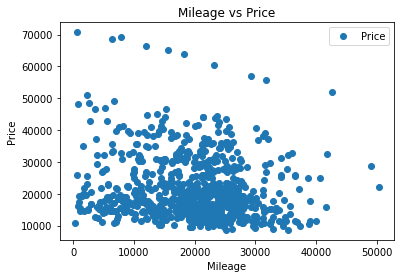

In [53]:
df1.groupby('Mileage')['Price'].mean()
import matplotlib.pyplot as plt
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

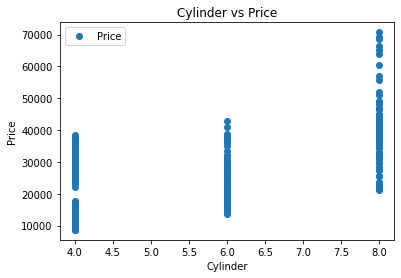

In [54]:
df1.groupby('Cylinder')['Price'].mean()
import matplotlib.pyplot as plt
df1.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

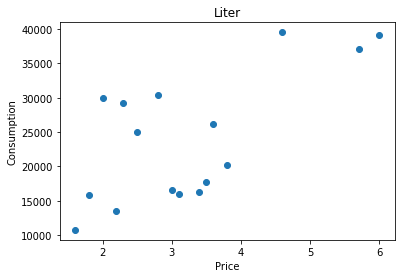

In [55]:
df1.groupby('Liter')['Price'].mean().plot(style='o')
plt.title('Liter')
plt.xlabel('Price')
plt.ylabel('Consumption')
plt.show()

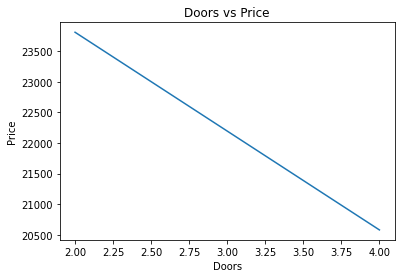

In [56]:
df1.groupby('Doors')['Price'].mean().plot()
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

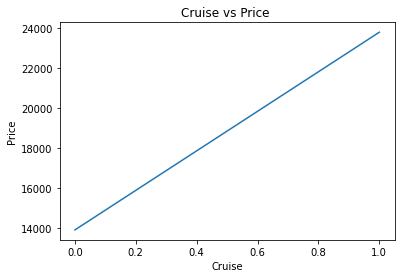

In [57]:
df1.groupby('Cruise')['Price'].mean().plot()
plt.title('Cruise vs Price ')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

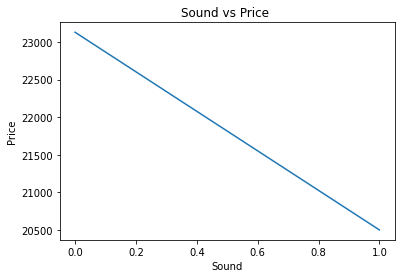

In [58]:
df1.groupby('Sound')['Price'].mean().plot()
plt.title('Sound vs Price ')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

In [59]:
df2=df
df2.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [60]:
df2.drop(['Mileage','Trim','Cylinder','Liter','Doors','Cruise','Sound','Leather'],axis='columns',inplace=True)


In [61]:
df2.head()

,Price,Make,Model,Type
0,17314.103129,Buick,Century,Sedan
1,17542.036083,Buick,Century,Sedan
2,16218.847862,Buick,Century,Sedan
3,16336.913140,Buick,Century,Sedan
4,16339.170324,Buick,Century,Sedan


In [62]:
x1=df2[['Make','Model','Type']]
x1.head()

,Make,Model,Type
0,Buick,Century,Sedan
1,Buick,Century,Sedan
2,Buick,Century,Sedan
3,Buick,Century,Sedan
4,Buick,Century,Sedan


In [63]:
y1=df['Price']
y1.head()

0    17314.103129
1    17542.036083
2    16218.847862
3    16336.913140
4    16339.170324
Name: Price, dtype: float64

In [64]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
x1=ohe.fit_transform(x1)
x1=x[:,1:]
x1
model.fit(x1,y1)
model.predict(x1)

array([25273.92479103, 21955.83782514, 21955.83782514, 23856.67681802,
       27174.76378392, 21955.83782514, 21955.83782514, 21955.83782514,
       27174.76378392, 25273.92479103, 23401.69571986, 21500.85672697,
       21500.85672697, 24818.94369286, 24818.94369286, 21500.85672697,
       23401.69571986, 24818.94369286, 21500.85672697, 24818.94369286,
       21500.85672697, 24818.94369286, 24818.94369286, 26719.78268575,
       23401.69571986, 26719.78268575, 23401.69571986, 23401.69571986,
       24818.94369286, 23401.69571986, 21318.8642877 , 21318.8642877 ,
       24636.9512536 , 26537.79024649, 26537.79024649, 23219.70328059,
       24636.9512536 , 21318.8642877 , 23219.70328059, 24636.9512536 ,
       26537.79024649, 24636.9512536 , 21318.8642877 , 23219.70328059,
       26537.79024649, 21318.8642877 , 21318.8642877 , 21318.8642877 ,
       21318.8642877 , 24636.9512536 , 23219.70328059, 21318.8642877 ,
       24636.9512536 , 21318.8642877 , 21318.8642877 , 26537.79024649,
      

In [65]:
df2.columns

Index(['Price', 'Make', 'Model', 'Type'], dtype='object')

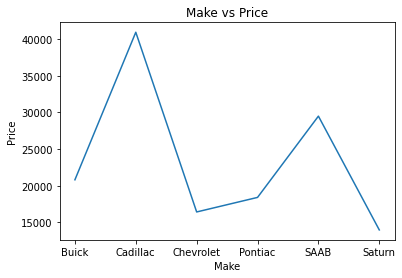

In [66]:
df2.groupby('Make')['Price'].mean().plot()
plt.title('Make vs Price')
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

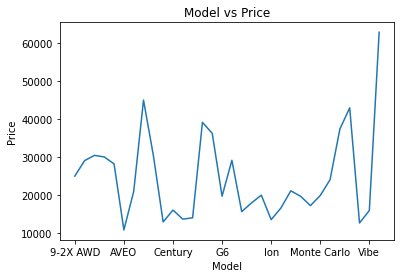

In [67]:
df2.groupby('Model')['Price'].mean().plot()
plt.title('Model vs Price')
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

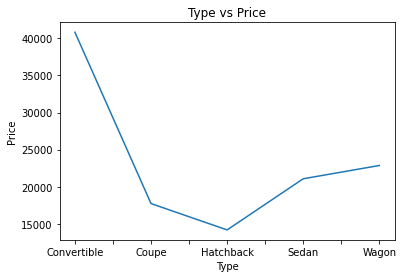

In [68]:
df2.groupby('Type')['Price'].mean().plot()
plt.title('Type vs Price')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()